# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import datetime
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key
print(f" My OpenWeather API key id is: {weather_api_key}")

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "../output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

 My OpenWeather API key id is: bdea52a1bffc6cc177f35ec08a660f13


In [2]:
# Define a function to stream to the standard output (print) and to an output file specified below
outpath = '../output_data/outputLog.txt'
def printLog(*args, **kwargs):
    print(*args, **kwargs)
    with open(outpath,'a') as file:
        print(*args, **kwargs, file=file)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
printLog("City count is ", len(cities))
cities
#
# Notice that the code provided up to now is almost exclusively provided to us
#

City count is  609


['ust-kuyga',
 'vaini',
 'damghan',
 'teguldet',
 'lata',
 'atuona',
 'manado',
 'taolanaro',
 'clearwater',
 'yellowknife',
 'rikitea',
 'port augusta',
 'sao joao da barra',
 'mys shmidta',
 'nanortalik',
 'kapaa',
 'mataura',
 'jamestown',
 'ushuaia',
 'longyearbyen',
 'new norfolk',
 'oktyabrskoye',
 'busselton',
 'fortuna',
 'kuching',
 'sentyabrskiy',
 'dicabisagan',
 'bethel',
 'flinders',
 'tiksi',
 'saint-philippe',
 'yar-sale',
 'sao felix do xingu',
 'kahului',
 'stromness',
 'luangwa',
 'jamshedpur',
 'durban',
 'castro',
 'hermanus',
 'punta arenas',
 'isangel',
 'port alfred',
 'sambava',
 'mar del plata',
 'bluff',
 'barrow',
 'bengkulu',
 'yemelyanovo',
 'tasiilaq',
 'caravelas',
 'kysyl-syr',
 'khatanga',
 'albany',
 'sarkand',
 'oksfjord',
 'cape town',
 'oistins',
 'belem de sao francisco',
 'thompson',
 'fort nelson',
 'hofn',
 'aswan',
 'provideniya',
 'van buren',
 'carutapera',
 'kavieng',
 'krasnoselkup',
 'lompoc',
 'hobart',
 'yudong',
 'smoky lake',
 'margate

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
# Build Rest API query URL
mycity = "Bialystok" # this is my home town I used for testing
units ="imperial"
url = "http://api.openweathermap.org/data/2.5/weather?"
base_url = url + "appid=" + weather_api_key + "&units=" + units + "&q=" # add city in the loop

In [5]:
# Initialize count variables and series used to build a composite city dataframe
record = 1
subset = 1

city = []  
lattitude = []
longitude = []
max_temp = []
humidity  = []
cloudiness= []
wind_speed = []
country  = []
date = []

In [6]:
# Print the header
printLog("-----------------------------")
printLog("Beginning Data Retrieval")
printLog("-----------------------------")

# Loop through all cities to get the weather data for each city in the list
for acity in range(len(cities)):
    # Make Rest API get requests and parse the resulting JSON responses one city at a time
    city_url = base_url + cities[acity]
    json_get_respose = requests.get(base_url + cities[acity]).json()

    try:
        # Parse JSON data created above to populate individual series
        city.append(json_get_respose['name'])
        lattitude.append(json_get_respose['coord']['lat'])
        longitude.append(json_get_respose['coord']['lon'])
        max_temp.append(json_get_respose['main']['temp_max'])
        humidity.append(json_get_respose['main']['humidity'])
        cloudiness.append(json_get_respose['clouds']['all'])
        wind_speed.append(json_get_respose['wind']['speed'])
        country.append(json_get_respose["sys"]["country"]) 
        timestamp = datetime.datetime.fromtimestamp(json_get_respose['dt'])
        date.append(timestamp.strftime('%m/%d/%y')) 

        # Manage looping logic and log hte resulting data
        if (record % 50) == 0:
            subset += 1    
        printLog(f"Processing Record {(record % 50)} of {subset} | {cities[acity]}")   
    except:
        printLog("City not found. Skipping...")
    record += 1      

printLog("-----------------------------")
printLog("Data Retrieval Complete")
printLog("-----------------------------")
if (record - 1) != len(cities):
    printLog(f"Check for dropped records!!!. Processed {record - 1} records but expected to process {len(cities)} records")      

-----------------------------
Beginning Data Retrieval
-----------------------------
Processing Record 1 of 1 | ust-kuyga
Processing Record 2 of 1 | vaini
Processing Record 3 of 1 | damghan
Processing Record 4 of 1 | teguldet
Processing Record 5 of 1 | lata
Processing Record 6 of 1 | atuona
Processing Record 7 of 1 | manado
City not found. Skipping...
Processing Record 9 of 1 | clearwater
Processing Record 10 of 1 | yellowknife
Processing Record 11 of 1 | rikitea
Processing Record 12 of 1 | port augusta
Processing Record 13 of 1 | sao joao da barra
City not found. Skipping...
Processing Record 15 of 1 | nanortalik
Processing Record 16 of 1 | kapaa
Processing Record 17 of 1 | mataura
Processing Record 18 of 1 | jamestown
Processing Record 19 of 1 | ushuaia
Processing Record 20 of 1 | longyearbyen
Processing Record 21 of 1 | new norfolk
Processing Record 22 of 1 | oktyabrskoye
Processing Record 23 of 1 | busselton
Processing Record 24 of 1 | fortuna
Processing Record 25 of 1 | kuching
Ci

City not found. Skipping...
Processing Record 25 of 5 | buraydah
Processing Record 26 of 5 | airai
Processing Record 27 of 5 | vestmannaeyjar
Processing Record 28 of 5 | san carlos de bariloche
Processing Record 29 of 5 | somerset west
Processing Record 30 of 5 | pisco
Processing Record 31 of 5 | saint george
Processing Record 32 of 5 | mahebourg
Processing Record 33 of 5 | lorengau
Processing Record 34 of 5 | latung
Processing Record 35 of 5 | mukilteo
City not found. Skipping...
Processing Record 37 of 5 | polovinnoye
City not found. Skipping...
Processing Record 39 of 5 | mutoko
Processing Record 40 of 5 | mago
Processing Record 41 of 5 | college
Processing Record 42 of 5 | sept-iles
Processing Record 43 of 5 | saint-georges
City not found. Skipping...
Processing Record 45 of 5 | saint-augustin
Processing Record 46 of 5 | ajdabiya
Processing Record 47 of 5 | darhan
Processing Record 48 of 5 | luanda
Processing Record 49 of 5 | sembe
Processing Record 0 of 6 | barcelos
Processing Rec

Processing Record 2 of 10 | udachnyy
Processing Record 3 of 10 | la palma
Processing Record 4 of 10 | ballina
Processing Record 5 of 10 | xining
Processing Record 6 of 10 | lucea
Processing Record 7 of 10 | shimoda
Processing Record 8 of 10 | nabire
Processing Record 9 of 10 | reyes
Processing Record 10 of 10 | camacha
Processing Record 11 of 10 | tottori
Processing Record 12 of 10 | agadez
Processing Record 13 of 10 | ponta do sol
Processing Record 14 of 10 | medea
City not found. Skipping...
Processing Record 16 of 10 | denpasar
Processing Record 17 of 10 | roma
Processing Record 18 of 10 | pacifica
Processing Record 19 of 10 | hami
Processing Record 20 of 10 | sigiriya
Processing Record 21 of 10 | jiehu
Processing Record 22 of 10 | chickasha
Processing Record 23 of 10 | iqaluit
Processing Record 24 of 10 | balclutha
Processing Record 25 of 10 | nkhotakota
Processing Record 26 of 10 | ixtapa
Processing Record 27 of 10 | smithers
City not found. Skipping...
Processing Record 29 of 10 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [7]:
# Combine individual series above to create a dataframe consisting of all of them
cities_weather = {'City': city, 'Lat': lattitude, 'Lng': longitude, 'Max Temp': max_temp, 'Humidity': humidity, 
                  'Cloudiness': cloudiness, 'Wind Speed': wind_speed, 'Country': country, 'Date': date}

cities_weather_df = pd.DataFrame(cities_weather)  
cities_weather_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Ust-Kuyga,70.02,135.60,2.03,85,4,5.86,RU,04/17/20
1,Vaini,-21.20,-175.20,82.40,65,20,12.75,TO,04/17/20
2,Dāmghān,36.17,54.35,56.34,34,10,4.12,IR,04/17/20
3,Tegul'det,57.31,88.17,43.61,62,0,5.61,RU,04/17/20
4,Lata,40.16,-8.33,55.00,91,0,2.48,PT,04/17/20
...,...,...,...,...,...,...,...,...,...
555,Camaná,-16.62,-72.71,71.33,75,95,7.20,PE,04/17/20
556,Takoradze,4.88,-1.76,80.89,85,100,9.60,GH,04/17/20
557,Hastings,50.86,0.57,46.00,94,100,1.01,GB,04/17/20
558,Tabora,-5.02,32.80,63.52,65,69,6.22,TZ,04/17/20


In [8]:
# Output data to an Excel CSV file
cities_weather_df.to_csv(output_data_file)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [9]:
# Use describe() method to see cities weather dataframe stats
cities_weather_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
count,560.000000,560.000000,560.000000,560.000000,560.000000,560.000000
mean,19.172250,17.542607,60.068375,70.012500,53.130357,7.573714
std,32.733079,89.351948,20.741467,21.052575,38.054699,5.554461
min,-54.800000,-175.200000,-3.080000,1.000000,0.000000,0.430000
25%,-7.465000,-60.085000,48.150000,58.000000,16.000000,3.380000
50%,21.715000,22.760000,62.015000,75.000000,59.500000,6.465000
75%,45.055000,98.755000,77.000000,86.000000,90.000000,10.000000
max,78.220000,179.320000,98.600000,100.000000,100.000000,35.570000


In [11]:
#Latitude-vs.-Temperature-Plot# Generate today's data for plotting
today = cities_weather_df['Date'][0]

#  Alert us if there are cities that have humidity over 100%. 
if cities_weather_df.loc[cities_weather_df["Humidity"] > 100].size > 0:
    print("This dataset needs cleaning since there are some entries with Humidity higher than 100%")

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

In [12]:
# OPTIONAL: Creating a function to create scatter plots based on latitude
def latitude_plot(df,yname,tname,ylabel,tdate,fname):    
    plt.scatter(df['Lat'], df[yname], edgecolors="black",facecolors="steelblue")
    plt.title(f"{tname} {tdate}")
    plt.ylabel(ylabel)
    plt.xlabel("Latitude")
    plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
    plt.savefig(fname)
    plt.show

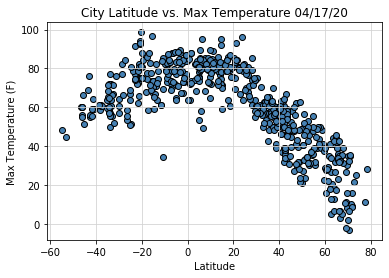

In [13]:
# Apply this function to Temperature Plot
latitude_plot(cities_weather_df,'Max Temp','City Latitude vs. Max Temperature','Max Temperature (F)', today, '../output_data/LatitudeVsMaxTemp.png')             

This plot analyses maximum temperature versus latitude. It shows:
    - highest temperatures are near the equator
    - temperatures for positive latitude value are lower than for negative ( Norther Hemisphere vs. Southern )

## Latitude vs. Humidity Plot

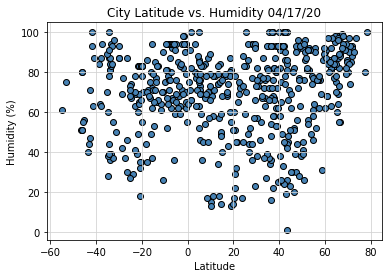

In [14]:
# Apply this function to Humidity Plot
latitude_plot(cities_weather_df,'Humidity','City Latitude vs. Humidity','Humidity (%)', today, '../output_data/LatitudeVsHumidity.png')              

This plot analyses humidity versus latitude. It shows:
    - there is no significant correlation betweeen humidity and latitude
    - there are more places in Norther Hemisphere than Southern with higher humidity

## Latitude vs. Cloudiness Plot

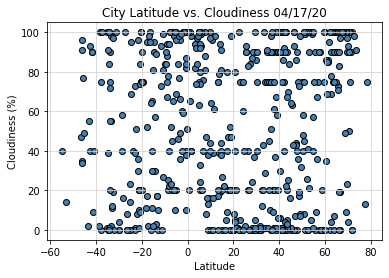

In [15]:
# Apply this function to Cloudiness Plot
latitude_plot(cities_weather_df,'Cloudiness','City Latitude vs. Cloudiness','Cloudiness (%)', today, '../output_data/LatitudeVsCloudiness.png')             

This plot analyses cloudiness versus latitude. It shows:
    - there is no significant correlation betweeen cloudiness and latitude
    - there are more places in Norther Hemisphere than Southern with higher cloudiness

## Latitude vs. Wind Speed Plot

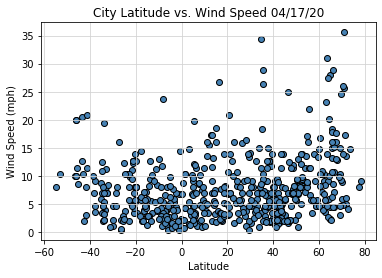

In [16]:
# Apply this function to Wind Speed Plot
latitude_plot(cities_weather_df,'Wind Speed','City Latitude vs. Wind Speed','Wind Speed (mph)', today, '../output_data/LatitudeVsWindSpeed.png')   

This plot analyses wind speed versus latitude. It shows:
    - there is no significant correlation betweeen wind speed and latitude
    - low wind speed values <= 15 mph are mostly represented across all latitudes
    - cities with most extremee wind values are mostly present in Northern Hemiphere - like mid-West region of the US

## Linear Regression

In [17]:
# OPTIONAL: Create a function to create Linear Regression plots
def latitude_regression_plot(df,yname,tname,ylabel,tdate,coord,fname):    
    x_values = df['Lat']
    y_values = df[yname]
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_equation = "y = " + str(round(slope,2)) + " x + " + str(round(intercept,2))
    plt.scatter(x_values, y_values)    
    plt.plot(x_values, regress_values, "r-")
    plt.title(f"{tname} {tdate}")
    plt.xlabel("Latitude")
    plt.ylabel(ylabel)
    plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
    plt.annotate(line_equation, coord, fontsize=13, color="red")
    print(f"The r-squared is: {rvalue}")    
    plt.savefig(fname)
    plt.show

In [18]:
# Create Northern Hemisphere DataFrame
northern_hemi_df = cities_weather_df.loc[cities_weather_df['Lat']>0,:]
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Ust-Kuyga,70.02,135.60,2.03,85,4,5.86,RU,04/17/20
2,Dāmghān,36.17,54.35,56.34,34,10,4.12,IR,04/17/20
3,Tegul'det,57.31,88.17,43.61,62,0,5.61,RU,04/17/20
4,Lata,40.16,-8.33,55.00,91,0,2.48,PT,04/17/20
6,Manado,1.49,124.85,87.80,66,40,10.29,ID,04/17/20


In [19]:
# Create Southern Hemisphere DataFrame
southern_hemi_df = cities_weather_df.loc[cities_weather_df['Lat']<0,:]
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
1,Vaini,-21.20,-175.20,82.40,65,20,12.75,TO,04/17/20
5,Atuona,-9.80,-139.03,82.35,75,84,13.06,PF,04/17/20
9,Rikitea,-23.12,-134.97,77.36,63,1,1.99,PF,04/17/20
10,Port Augusta,-32.50,137.77,66.99,55,19,6.93,AU,04/17/20
11,São João da Barra,-21.64,-41.05,72.48,83,96,11.12,BR,04/17/20


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: -0.8785944850744886


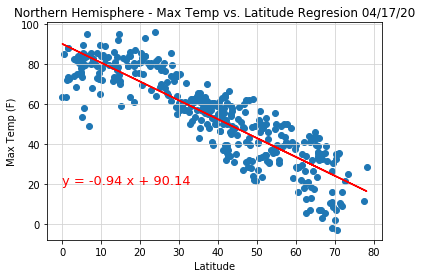

In [20]:
latitude_regression_plot(northern_hemi_df, 'Max Temp', 'Northern Hemisphere - Max Temp vs. Latitude Regresion', 'Max Temp (F)', today, (0,20), '../output_data/Northern_HemiRegresion_vs_MaxTemp.png')

There is a negative and quite strong correlation between Max Temp and Latitude Regresion in the Northern Hemisphere. 
R-square of -0.87 implies this regresion model is quite strong and it fits the set of obsevations. 

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.595778446917643


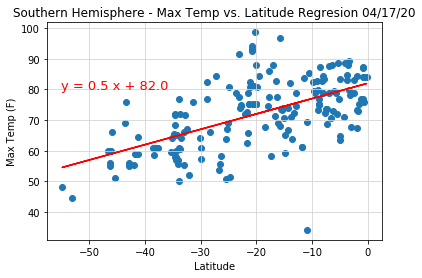

In [21]:
latitude_regression_plot(southern_hemi_df, 'Max Temp', 'Southern Hemisphere - Max Temp vs. Latitude Regresion', 'Max Temp (F)', today, (-55,80), '../output_data/Southern_HemiRegresion_vs_MaxTemp.png')

There is a positive and quite weak correlation between Max Temp and Latitude Regresion in the Southern Hemisphere.
R-square of -0.87 implies this regresion model is reasonably strong and it fits the set of obsevations. 

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.2610603403224033


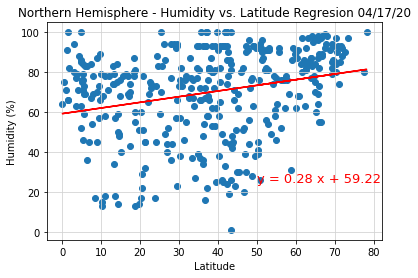

In [22]:
latitude_regression_plot(northern_hemi_df, 'Humidity', 'Northern Hemisphere - Humidity vs. Latitude Regresion', 'Humidity (%)', today, (50,25), '../output_data/Northern_HemiRegresion_vs_Humidity.png')

There is a positive correlation between Humidity and Latitude Regresion in the Northern Hemisphere.  
R-square of 0.26 implies this regresion model is not strong and it does not fit the set of obsevations. 

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.20000851915353518


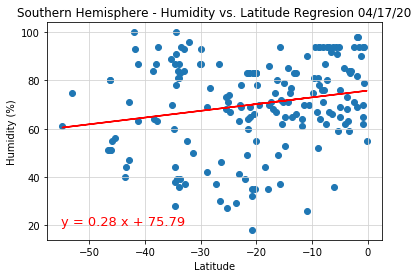

In [23]:
latitude_regression_plot(southern_hemi_df, 'Humidity', 'Southern Hemisphere - Humidity vs. Latitude Regresion', 'Humidity (%)', today, (-55,20), '../output_data/Southern_HemiRegresion_vs_Humidity.png')

There is a positive weak correlation between Humidity  and Latitude Regresion in the Southern Hemisphere.  
R-square of 0.20 implies this regresion model is not very strong and it does not fit the set of obsevations. 

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.12460538200235394


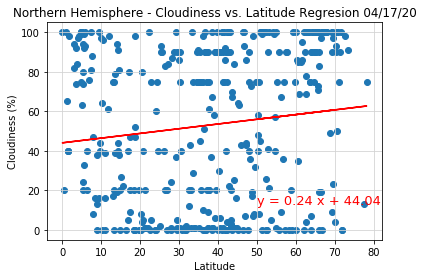

In [24]:
latitude_regression_plot(northern_hemi_df, 'Cloudiness', 'Northern Hemisphere - Cloudiness vs. Latitude Regresion', 'Cloudiness (%)', today, (50,13), '../output_data/Northern_HemiRegresion_vs_Cloudiness.png')

There is a positive weak correlation between Cloudiness and Latitude Regresion in the Northern hemisphere. 
R-square of 0.12 implies this regresion model is weak not fitting the set of obsevations. 

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.18939146984901295


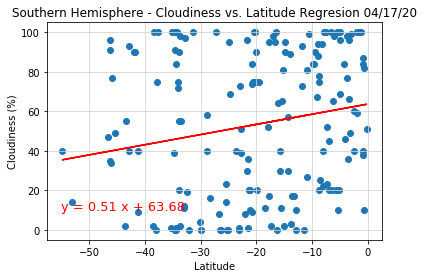

In [25]:
latitude_regression_plot(southern_hemi_df, 'Cloudiness', 'Southern Hemisphere - Cloudiness vs. Latitude Regresion', 'Cloudiness (%)', today, (-55,10), '../output_data/Southern_HemiRegresion_vs_Cloudiness.png')


There is a positive weak correlation between Cloudiness and Latitude Regresion in the Southern Hemisphere. 
R-square of 0.19 implies this regresion model is not strong and not fitting the set of obsevations. 

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.24507324483702997


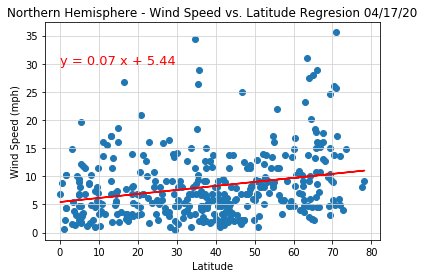

In [26]:
latitude_regression_plot(northern_hemi_df, 'Wind Speed', 'Northern Hemisphere - Wind Speed vs. Latitude Regresion', 'Wind Speed (mph)', today, (0,30), '../output_data/Northern_HemiRegresion_vs_WindSpeed.png')

There is a positive correlation between Wind Speed and Latitude Regresion in the Northern hemisphere. 
R-square of 0.25 implies this regresion model is not strong and it doesn't fit the set of obsevations. 

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.36982412080854915


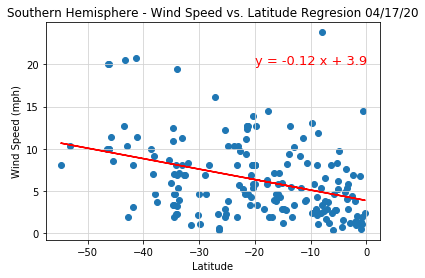

In [27]:
latitude_regression_plot(southern_hemi_df, 'Wind Speed', 'Southern Hemisphere - Wind Speed vs. Latitude Regresion', 'Wind Speed (mph)', today, (-20,20), '../output_data/Southern_HemiRegresion_vs_WindSpeed.png')

There is a negative weak correlation between Wind Speed and Latitude Regresion in the Southern Hemisphere. 
R-square of -0.37 implies this regresion model is not strong and not fitting the set of obsevations. 